In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../data/s3e17/train.csv', 
                      index_col='id')
test_df = pd.read_csv('../data/s3e17/test.csv', 
                     index_col='id')

In [3]:
train_df.head().T

id,0,1,2,3,4
Product ID,L50096,M20343,L49454,L53355,M24050
Type,L,M,L,L,M
Air temperature [K],300.6,302.6,299.3,301.0,298.0
Process temperature [K],309.6,312.1,308.5,310.9,309.0
Rotational speed [rpm],1596,1759,1805,1524,1641
Torque [Nm],36.1,29.1,26.5,44.3,35.4
Tool wear [min],140,200,25,197,34
Machine failure,0,0,0,0,0
TWF,0,0,0,0,0
HDF,0,0,0,0,0


In [4]:
test_df.head().T

id,136429,136430,136431,136432,136433
Product ID,L50896,L53866,L50498,M21232,M19751
Type,L,L,L,M,M
Air temperature [K],302.3,301.7,301.3,300.1,303.4
Process temperature [K],311.5,311.0,310.4,309.6,312.3
Rotational speed [rpm],1499,1713,1525,1479,1515
Torque [Nm],38.0,28.8,37.7,47.6,41.3
Tool wear [min],60,17,96,5,114
TWF,0,0,0,0,0
HDF,0,0,0,0,0
PWF,0,0,0,0,0


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0
OSF,136429.0,0.003958,0.062789,0.0,0.0,0.0,0.0,1.0


In [6]:
for col in train_df.columns:
    print(f'The number of unique values in {col} is: {len(train_df[col].unique())}.')
    print('--------------')

The number of unique values in Product ID is: 9976.
--------------
The number of unique values in Type is: 3.
--------------
The number of unique values in Air temperature [K] is: 95.
--------------
The number of unique values in Process temperature [K] is: 81.
--------------
The number of unique values in Rotational speed [rpm] is: 952.
--------------
The number of unique values in Torque [Nm] is: 611.
--------------
The number of unique values in Tool wear [min] is: 246.
--------------
The number of unique values in Machine failure is: 2.
--------------
The number of unique values in TWF is: 2.
--------------
The number of unique values in HDF is: 2.
--------------
The number of unique values in PWF is: 2.
--------------
The number of unique values in OSF is: 2.
--------------
The number of unique values in RNF is: 2.
--------------


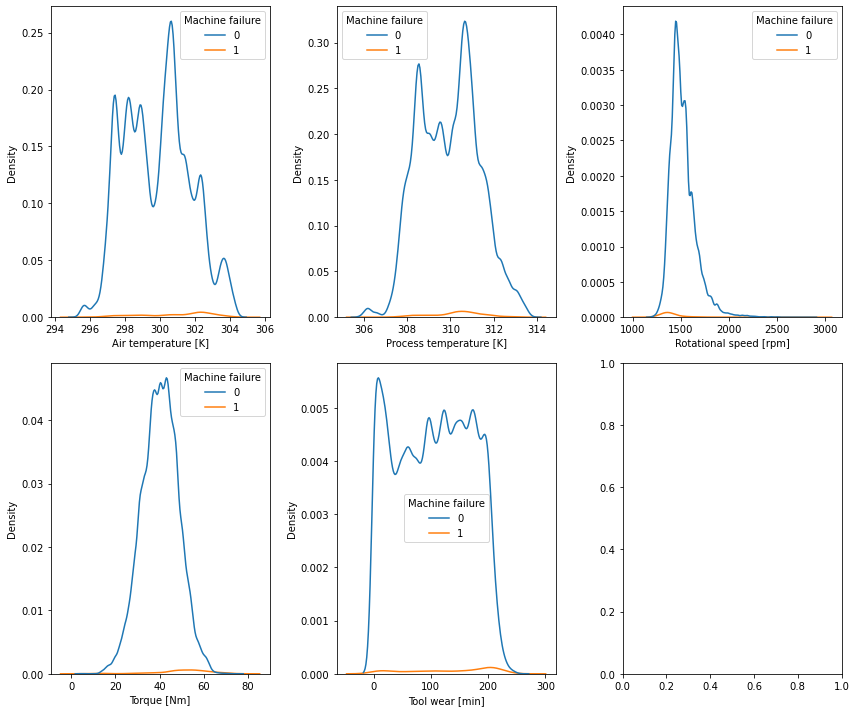

In [10]:
cont_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
             'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    sns.kdeplot(data=train_df, x=col, hue='Machine failure', ax=axes[i])

plt.tight_layout()

### Failure rate relationship with continuous factors

In [23]:
def calculate_failure_probability(df, col):
    df = train_df.groupby(col).agg({'Machine failure': 'mean'})
    df = df.reset_index()
    return df

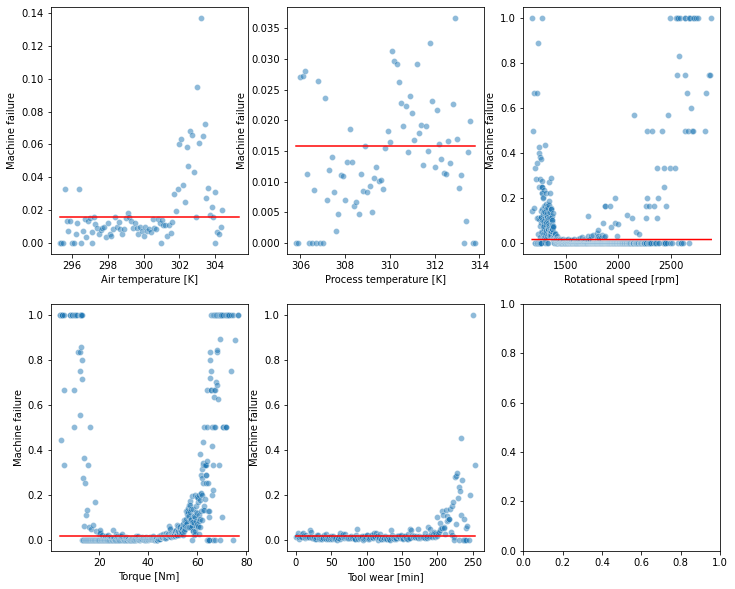

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
    df = calculate_failure_probability(train_df, col)
    sns.scatterplot(data=df, x=col, y='Machine failure', alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(min(train_df[col]), 
                            max(train_df[col])+1, 1), 
                            y=0.015744, color='red', ax=axes[i])

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

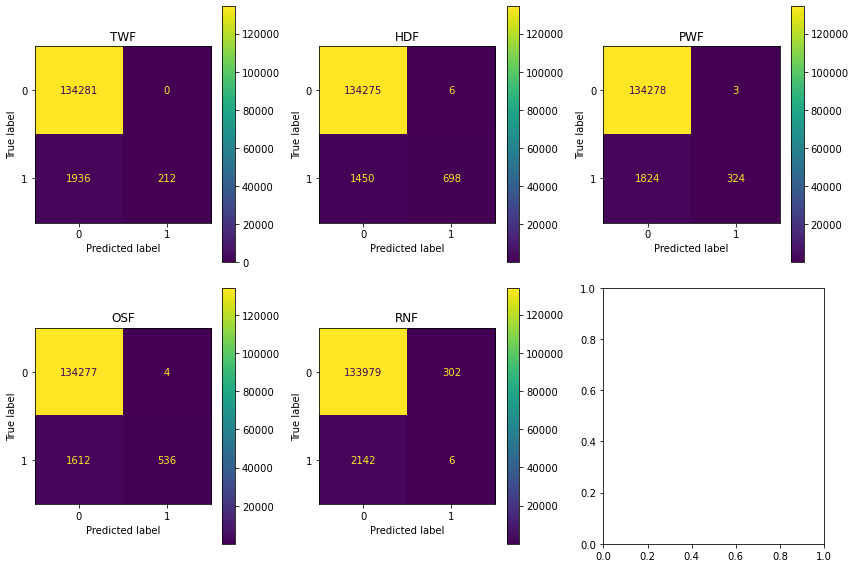

In [34]:

dis_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(dis_cols):
    cm = confusion_matrix(train_df['Machine failure'], train_df[col])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()